In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 2

In [2]:
# psi = Axy
A = 5

x = np.linspace(-10., 15., 26)
y = np.linspace(-5., 5., 11.)
xmat,ymat = np.meshgrid(x, y)

psi = A * xmat * ymat
phi = A/2 * (xmat**2 - ymat**2)

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


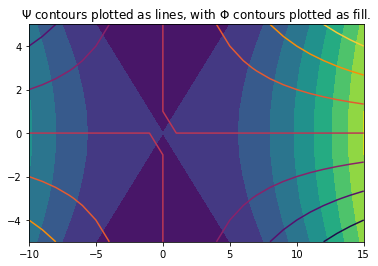

In [3]:
plt.contour(xmat, ymat, psi, cmap='inferno')
plt.contourf(xmat, ymat, phi, cmap='viridis')
plt.title('$\Psi$ contours plotted as lines, with $\Phi$ contours plotted as fill.')
plt.savefig('Qu_2_psi_against_phi.png')

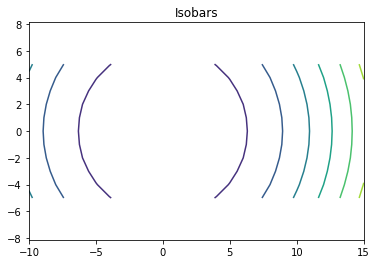

In [4]:
k = 5 # arbitrary
p_x_y = k*(xmat**2 + ymat**2) # p(x,y)
plt.contour(xmat,ymat,p_x_y)
plt.axis('equal')
plt.title('Isobars')
plt.savefig('Qu_2_isobars.png')


# Question 3

In [5]:
A = 2 # arbritary
rho = 101 # arbritary

# polar
r = np.linspace(0., 5., 51)
theta = np.linspace(0., (5/3)*math.pi, 51) 

# cartesian
xmat,ymat = np.meshgrid(r,theta)
psi = np.zeros((xmat.shape))
p_r_th = np.zeros((xmat.shape)) # p(r,theta)

# transform x and y array and generate psi array
for ir in range(r.size):
    for ith in range(theta.size):
        xmat[ir, ith] = r[ir] * np.cos(theta[ith])
        ymat[ir, ith] = r[ir] * np.sin(theta[ith])
        psi[ir, ith] =  A * r[ir]**(6/5) * np.sin((6/5)*theta[ith])
        p_r_th[ir, ith] = (-72/50) * (A**2) * rho * (r[ir]**(2/5))

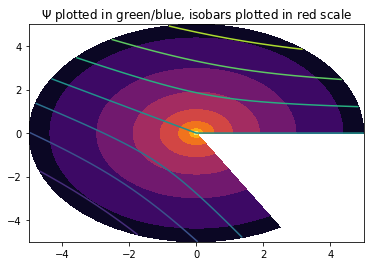

In [6]:
plt.contour(xmat, ymat, psi)
plt.contourf(xmat, ymat, p_r_th, cmap='inferno')
plt.title('$\Psi$ plotted in green/blue, isobars plotted in red scale')
plt.savefig('Qu_3_psi_plotted_with_isobars.png')

# Question 13

In [7]:
phi = np.linspace(-3,24,51)
psi = np.linspace(-math.pi,math.pi,21)
phimat,psimat = np.meshgrid(phi,psi)

F = phimat + 1j*psimat

z = F - np.exp(-F)
z = z.T #want to plot psi not phi contours in next block

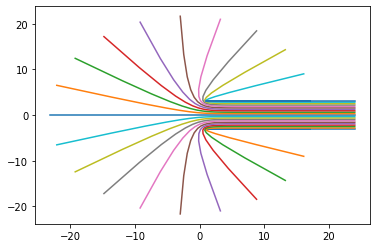

In [8]:
plt.plot(np.real(z), np.imag(z))
plt.show()

# plt.plot(np.linspace(0,20,100), -np.ones(100)*math.pi)

# Question 16

In [9]:
x = np.linspace(-5,5,100)
y = np.linspace(0,5,50)
xmat,ymat = np.meshgrid(x,y)

U = 5
h = 0.5
m = 1*math.pi*U*h

z = xmat + 1j*ymat
z = z.T

F = U*z - (m/(2*math.pi))*np.log(z**2 + h**2)
# F = F.T

phi = np.real(F)
psi = np.imag(F)

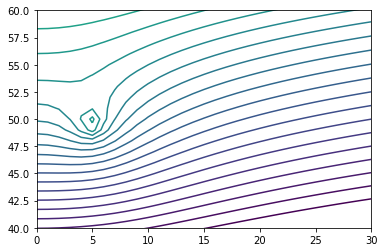

In [10]:
plt.contour(phi, np.linspace(-2*math.pi,4*math.pi,31))
plt.xlim(0,30)
plt.ylim(40,60)
plt.show()

# Question 17

In [11]:
m = 10 # arbitary  
a = 5

x = np.linspace(0,6*a,100)
xmat = np.meshgrid(x)
   
u = -(m/math.pi)*((x-2*a)/((x-2*a)**2+a**2) + (x+2*a)/((x+2*a)**2 + a**2))

Text(0.5, 0, '$x/a$')

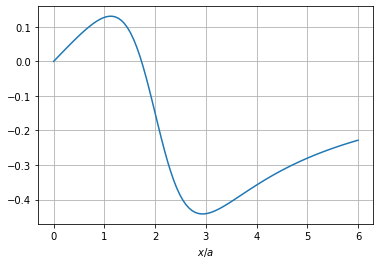

In [12]:
plt.plot(x/a, u)
plt.grid()
plt.xlabel('$x/a$')

We can see the stagnation point lies at approximately $x \simeq 1.7a$

# Question 25

In [85]:
x_start = -5
y_start = 0
z_start = -10

x_ax = np.linspace(-5,5,100)
y_ax = np.linspace(0,5,50)
z_ax = np.linspace(-10,10,50)
xmat,ymat,zmat = np.meshgrid(x_ax,y_ax,z_ax)
print(xmat.shape,ymat.shape)


def u(t, alpha, omega):
    u = -0.5*alpha*xmat - omega*ymat*np.exp(alpha*t) 
    v = -0.5*alpha*ymat + omega*xmat*np.exp(alpha*t) 
    w = alpha*zmat
    return u,v,w

u,v,w = u(t=0, alpha=1, omega=4)



# t_range = np.linspace(0,10,1000)

# for t in t_range:
#     u_x,u_y,u_z = u(t, alpha=1, omega=4)
    

(50, 100, 50) (50, 100, 50)


In [83]:
# import plotly.graph_objects as go

# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/streamtube-wind.csv').drop(['Unnamed: 0'],axis=1)

# u = u.flatten()
# v = v.flatten()
# w = w.flatten()

# fig = go.Figure(data=go.Streamtube(
#     x = x_ax,
#     y = y_ax,
#     z = z_ax,
#     u = u,
#     v = v,
#     w = w,
# #     x = df['x'],
# #     y = df['y'],
# #     z = df['z'],
# #     u = df['u'],
# #     v = df['v'],
# #     w = df['w'],
#     starts = dict(
#         x = [x_start+1] * 16,
#         y = [i for i in np.linspace(y_start,y_ax[-1],4)] * 4,
#         z = [i for i in np.linspace(z_start,z_ax[-1],4)] * 4
#     ),
#     sizeref = 1.,
#     colorscale = 'Portland',
#     showscale = False,
#     maxdisplayed = 30000
# ))

# fig.update_layout(
#     scene = dict(
#         aspectratio = dict(
#             x = 2,
#             y = 1,
#             z = 0.3
#         )
#     )
# )

# fig.show()

In [87]:
import plotly.figure_factory as ff

for u,v in zip(u[:][:],v[:][:]):
    fig = ff.create_streamline(x, y, u, v, arrow_scale=.5)
    fig.show()

Could not find another way of plotting this velocity field.

# Question 29

In [106]:
r_ax = np.linspace(-100, 100, 2000)
rmat = np.meshgrid(r_ax)[0]

circ_0 = 10
R = 2

u_r = [0]
u_th = (circ_0/(2*math.pi*rmat))*(1 - np.exp(-((rmat/R)**2)))
u_z = [0]

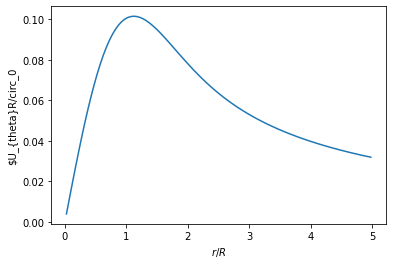

In [111]:
plt.plot(rmat[1000:1000+20*5]/R,u_th[1000:1000+20*5]*(R/circ_0))
plt.xlabel('$r/R$')
plt.ylabel('$U_{theta}R/circ_0')
plt.show()

In [109]:
u_th[-5:],u_th[:5]

(array([0.01597944, 0.01596341, 0.01594741, 0.01593143, 0.01591549]),
 array([-0.01591549, -0.01593143, -0.01594741, -0.01596341, -0.01597944]))

## testing

In [13]:
h0 = 10.; a = 0.25; x0 = 2.; b = 4.; y0 = -1.

x = np.linspace(-10., 15., 26)
y = np.linspace(-5., 5., 11.)
xmat,ymat = np.meshgrid(x, y)

h = h0 - a * (xmat - x0)**2 - b * (ymat - y0)**2  

# print(xmat,ymat)

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


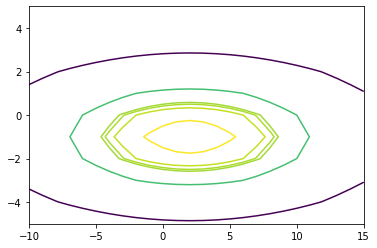

In [14]:
plt.contour(xmat, ymat, h, [-50,-10,-1,0,2,7])

In [65]:
np.int64(np.linspace(y_start,y_ax[-1],16))
[i for i in np.linspace(y_start,y_ax[-1],16)]

[0.0,
 0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666665,
 2.0,
 2.333333333333333,
 2.6666666666666665,
 3.0,
 3.333333333333333,
 3.6666666666666665,
 4.0,
 4.333333333333333,
 4.666666666666666,
 5.0]

In [77]:
df['u'].head(), u[:15]

(0    0.56851
 1    0.56851
 2    0.56851
 3    0.87909
 4    0.56851
 Name: u, dtype: float64,
 array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
        2.5, 2.5]))